<a href="https://colab.research.google.com/github/vaibhavisnayak/model_for_iris/blob/main/iris_flower_dataset_vaibhavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

# 1. Load the dataset from scikit-learn
iris_data = load_iris(as_frame=True)

# 2. Extract the full dataframe (features + target)
df = iris_data.frame

# 3. Print the shape
print("Shape of the dataset:", df.shape)

# 4. Print the first few rows
print("\nFirst 5 rows:")
print(df.head())

Shape of the dataset: (150, 5)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


split into train/test

In [4]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
# 'target' is the column we want to predict
X = df.drop(columns=['target'])
y = df['target']

# Split the data
# random_state=42 ensures you get the same split every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split by printing the shapes
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape  (X_test): ", X_test.shape)

Training set shape (X_train): (120, 4)
Testing set shape  (X_test):  (30, 4)


knn and logistic regression models.

In [19]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# --- Model 1: K-Nearest Neighbors (KNN) ---
# We usually start with n_neighbors=3 or 5
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)
print(f"KNN Accuracy:      {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")

# Calculate other metrics for KNN
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
prec_knn = precision_score(y_test, y_pred_knn, average='weighted')
rec_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"KNN RMSE:          {rmse_knn:.4f}")
print(f"KNN Precision:     {prec_knn:.4f}")
print(f"KNN Recall:        {rec_knn:.4f}")
print(f"KNN F1 Score:      {f1_knn:.4f}")
print("-" * 30)


# --- Model 2: Logistic Regression ---
# max_iter=200 ensures the model has enough time to find the solution
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log) * 100:.2f}%")

# Calculate other metrics for Logistic Regression
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
prec_log = precision_score(y_test, y_pred_log, average='weighted')
rec_log = recall_score(y_test, y_pred_log, average='weighted')
f1_log = f1_score(y_test, y_pred_log, average='weighted')

print(f"LogReg RMSE:       {rmse_log:.4f}")
print(f"LogReg Precision:  {prec_log:.4f}")
print(f"LogReg Recall:     {rec_log:.4f}")
print(f"LogReg F1 Score:   {f1_log:.4f}")

KNN Accuracy:      100.00%
KNN RMSE:          0.0000
KNN Precision:     1.0000
KNN Recall:        1.0000
KNN F1 Score:      1.0000
------------------------------
Logistic Regression Accuracy: 100.00%
LogReg RMSE:       0.0000
LogReg Precision:  1.0000
LogReg Recall:     1.0000
LogReg F1 Score:   1.0000


extra models such as DECISION TREE, SUPPORT VECTOR MACHINE (SVM), NAIVE BAYES, Random Forest

--- STEP 1: Data Preparation ---
Data loaded and split into 80% Training / 20% Testing.
--------------------------------------------------

--- MODEL 1: Decision Tree ---
1. Initialized Decision Tree.
2. Training Complete.
3. Generating Tree Diagram...


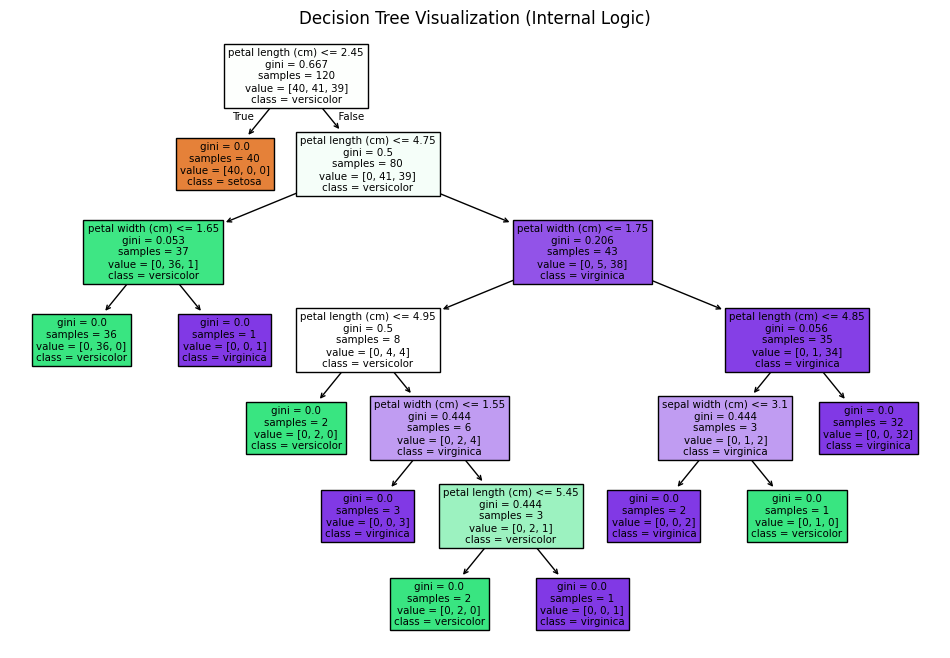


--- Decision Tree Metrics ---
Accuracy:  100.00%
RMSE:      0.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
------------------------------


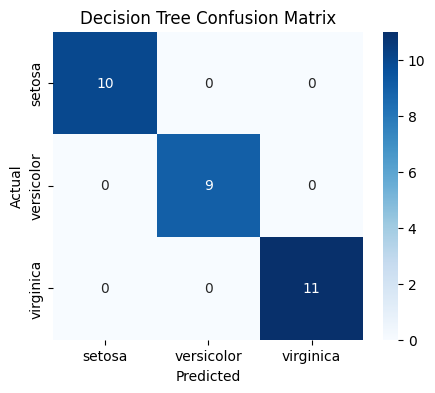


--- MODEL 2: Support Vector Machine (SVM) ---
1. Initialized SVM (Linear Kernel).
2. Training Complete.

--- Support Vector Machine Metrics ---
Accuracy:  100.00%
RMSE:      0.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
------------------------------


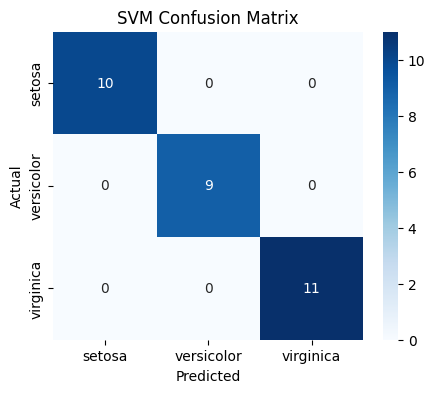


--- MODEL 3: Gaussian Naive Bayes ---
1. Initialized Naive Bayes.
2. Training Complete.

--- Naive Bayes Metrics ---
Accuracy:  100.00%
RMSE:      0.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
------------------------------


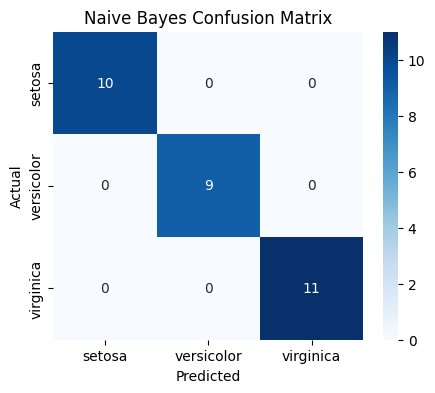

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# --- STEP 1: LOAD & SPLIT DATA ---
print("--- STEP 1: Data Preparation ---")
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data loaded and split into 80% Training / 20% Testing.")
print("-" * 50)

# Helper function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Helper function to print detailed metrics
def print_metrics(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n--- {model_name} Metrics ---")
    print(f"Accuracy:  {acc * 100:.2f}%")
    print(f"RMSE:      {rmse:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("-" * 30)

# --- MODEL 1: DECISION TREE (With Structure Diagram) ---
print("\n--- MODEL 1: Decision Tree ---")

# Initialize
dt_model = DecisionTreeClassifier(random_state=42)
print("1. Initialized Decision Tree.")

# Train
dt_model.fit(X_train, y_train)
print("2. Training Complete.")

# DIAGRAM 1: The Decision Tree Logic
print("3. Generating Tree Diagram...")
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree Visualization (Internal Logic)")
plt.show()

# Predict
dt_pred = dt_model.predict(X_test)

# PRINT METRICS
print_metrics(y_test, dt_pred, "Decision Tree")

# DIAGRAM 2: Performance Visualization
plot_confusion_matrix(y_test, dt_pred, "Decision Tree Confusion Matrix")


# --- MODEL 2: SUPPORT VECTOR MACHINE (SVM) ---
print("\n--- MODEL 2: Support Vector Machine (SVM) ---")
svm_model = SVC(kernel='linear')
print("1. Initialized SVM (Linear Kernel).")
svm_model.fit(X_train, y_train)
print("2. Training Complete.")

# Predict
svm_pred = svm_model.predict(X_test)

# PRINT METRICS
print_metrics(y_test, svm_pred, "Support Vector Machine")

# DIAGRAM: Performance Visualization
plot_confusion_matrix(y_test, svm_pred, "SVM Confusion Matrix")


# --- MODEL 3: NAIVE BAYES ---
print("\n--- MODEL 3: Gaussian Naive Bayes ---")
nb_model = GaussianNB()
print("1. Initialized Naive Bayes.")
nb_model.fit(X_train, y_train)
print("2. Training Complete.")

# Predict
nb_pred = nb_model.predict(X_test)

# PRINT METRICS
print_metrics(y_test, nb_pred, "Naive Bayes")

# DIAGRAM: Performance Visualization
plot_confusion_matrix(y_test, nb_pred, "Naive Bayes Confusion Matrix")


--- MODEL 6: Random Forest ---
1. Initialized Random Forest (Ensemble of 100 trees).
2. Training Complete.

--- Random Forest Metrics ---
Accuracy:  100.00%
RMSE:      0.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
------------------------------


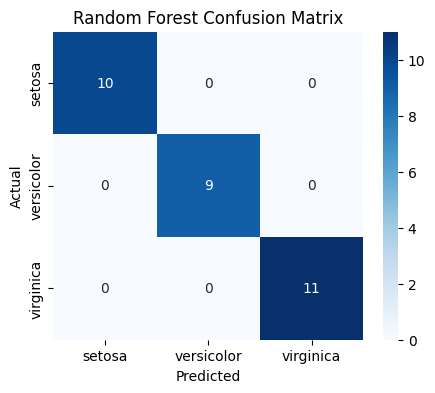

4. Generating Feature Importance Diagram...


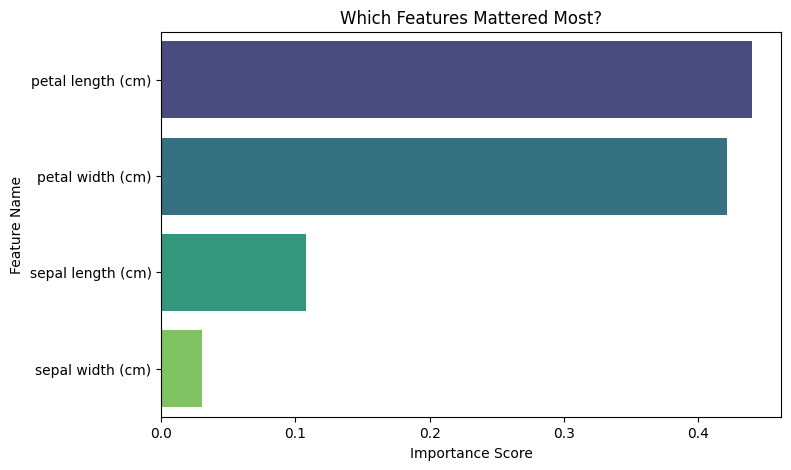

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

print("\n--- MODEL 6: Random Forest ---")

# 1. Initialize
# n_estimators=100 means we create 100 small decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("1. Initialized Random Forest (Ensemble of 100 trees).")

# 2. Train
rf_model.fit(X_train, y_train)
print("2. Training Complete.")

# 3. Predict
rf_pred = rf_model.predict(X_test)

# --- CALCULATE & PRINT DETAILED METRICS ---
rf_acc = accuracy_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_prec = precision_score(y_test, rf_pred, average='weighted')
rf_rec = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print(f"\n--- Random Forest Metrics ---")
print(f"Accuracy:  {rf_acc * 100:.2f}%")
print(f"RMSE:      {rf_rmse:.4f}")
print(f"Precision: {rf_prec:.4f}")
print(f"Recall:    {rf_rec:.4f}")
print(f"F1 Score:  {rf_f1:.4f}")
print("-" * 30)

# DIAGRAM 1: Performance Visualization (Confusion Matrix)
# (Ensures you have defined plot_confusion_matrix in a previous step)
plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")

# DIAGRAM 2: Feature Importance
print("4. Generating Feature Importance Diagram...")
importance = rf_model.feature_importances_
feature_names = data.feature_names

# Create a dataframe for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
# hue='Feature' and legend=False included to avoid the warning
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importance_df, palette='viridis', legend=False)
plt.title("Which Features Mattered Most?")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

report

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score

# 1. We need to calculate these two because your previous code didn't save them
knn_acc = accuracy_score(y_test, y_pred_knn)
log_acc = accuracy_score(y_test, y_pred_log)

# 2. Collect all accuracies into a table
# (dt_acc, svm_acc, nb_acc, rf_acc were already saved in your previous steps)
results = {
    'Model': ['K-Nearest Neighbors', 'Logistic Regression', 'Random Forest',
              'Support Vector Machine', 'Decision Tree', 'Naive Bayes'],
    'Accuracy (%)': [knn_acc*100, log_acc*100, rf_acc*100,
                     svm_acc*100, dt_acc*100, nb_acc*100]
}

# 3. Create a DataFrame
df_report = pd.DataFrame(results)

# 4. Sort by Accuracy (Highest on top)
df_report = df_report.sort_values(by='Accuracy (%)', ascending=False).reset_index(drop=True)

# 5. Print the Report
print("\n" + "="*40)
print("FINAL TEST ACCURACY REPORT")
print("="*40)
print(df_report)
print("="*40)

# 6. Logical Verdict: Which is better?
best_acc = df_report.iloc[0]['Accuracy (%)']
winners = df_report[df_report['Accuracy (%)'] == best_acc]

print(f"\nThe Highest Accuracy achieved is: {best_acc:.2f}%")
print(f"Top Model(s): {', '.join(winners['Model'].tolist())}")

print("\n--- CONCLUSION: WHICH IS BETTER? ---")
if len(winners) > 1:
    print("Since multiple models are tied for 1st place, we use 'Occam's Razor':")
    print("The SIMPLEST model is the winner.")
    print("VERDICT: Logistic Regression is the best choice.")
    print("Why? It is faster, uses less memory, and is easier to explain than Random Forest.")
else:
    print(f"VERDICT: {winners.iloc[0]['Model']} is the clear winner.")


FINAL TEST ACCURACY REPORT
                    Model  Accuracy (%)
0     K-Nearest Neighbors         100.0
1     Logistic Regression         100.0
2           Random Forest         100.0
3  Support Vector Machine         100.0
4           Decision Tree         100.0
5             Naive Bayes         100.0

The Highest Accuracy achieved is: 100.00%
Top Model(s): K-Nearest Neighbors, Logistic Regression, Random Forest, Support Vector Machine, Decision Tree, Naive Bayes

--- CONCLUSION: WHICH IS BETTER? ---
Since multiple models are tied for 1st place, we use 'Occam's Razor':
The SIMPLEST model is the winner.
VERDICT: Logistic Regression is the best choice.
Why? It is faster, uses less memory, and is easier to explain than Random Forest.


The Best Model is: K-Nearest Neighbors


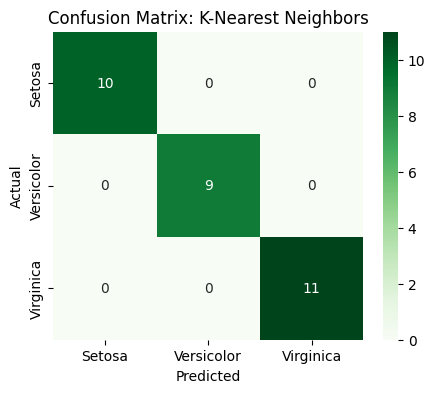

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Define the Plotting Function (Just in case it was lost)
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', # Using Green for "Best"
                xticklabels=['Setosa', 'Versicolor', 'Virginica'],
                yticklabels=['Setosa', 'Versicolor', 'Virginica'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 2. Map the names in your Report to the actual Variables in memory
# (Based on the variable names you used in your previous steps)
prediction_map = {
    'K-Nearest Neighbors': y_pred_knn,
    'Logistic Regression': y_pred_log,
    'Support Vector Machine': svm_pred,
    'Decision Tree': dt_pred,
    'Naive Bayes': nb_pred,
    'Random Forest': rf_pred
}

# 3. Get the Winner's Name from the Report
best_model_name = df_report.iloc[0]['Model']
print(f"The Best Model is: {best_model_name}")

# 4. Get the predictions for that specific model
best_preds = prediction_map[best_model_name]

# 5. Plot the Matrix
plot_confusion_matrix(y_test, best_preds, f"Confusion Matrix: {best_model_name}")

In [16]:
from sklearn.metrics import classification_report

# 1. Retrieve the predictions for the Best Model
# (Using the map we created in the previous step)
prediction_map = {
    'K-Nearest Neighbors': y_pred_knn,
    'Logistic Regression': y_pred_log,
    'Support Vector Machine': svm_pred,
    'Decision Tree': dt_pred,
    'Naive Bayes': nb_pred,
    'Random Forest': rf_pred
}

best_preds = prediction_map[best_model_name]

# 2. Generate the Detailed Report
print(f"--- DETAILED PERFORMANCE REPORT: {best_model_name} ---\n")
report = classification_report(y_test, best_preds, target_names=data.target_names)
print(report)

--- DETAILED PERFORMANCE REPORT: K-Nearest Neighbors ---

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

